In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
import tensorflow.keras.losses
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import ROC_AUC
import itertools
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from transformer_layers import patch_extract, patch_embedding, patch_merging
from swin_layers import SwinTransformerBlock, Mlp, WindowAttention
from tf_keras_vis.utils.scores import CategoricalScore
import matplotlib.cm as cm



def categorical_smooth_loss(y_true, y_pred, label_smoothing=0.1):
    loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred, label_smoothing=label_smoothing)
    return loss

keras.losses.categorical_smooth_loss = categorical_smooth_loss
reconstructed_model = keras.models.load_model("model_fold_1.h5",custom_objects={'patch_extract': patch_extract,'patch_embedding':patch_embedding,'Mlp':Mlp,
                                                                                       'WindowAttention':WindowAttention,'SwinTransformerBlock':SwinTransformerBlock,'patch_merging':patch_merging,'categorical_smooth_loss':categorical_smooth_loss})

reconstructed_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 inception_resnet_v2 (Functiona  (None, 5, 5, 1536)  54336736    ['input_4[0][0]']                
 l)                                                                                               
                                                                                                  
 densenet201 (Functional)       (None, 7, 7, 1920)   18321984    ['input_4[0][0]']                
                                                                                              

In [2]:
from tensorflow import keras as K


In [12]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications import Xception

In [13]:
inception_model = InceptionResNetV2(include_top=False, weights=None)

In [14]:
densenet_model = DenseNet201(include_top=False, weights=None)

In [15]:
xception_model = Xception(include_top=False, weights=None)

In [16]:
inception_model.load_weights('weights_fold_1.h5', by_name=True)
densenet_model.load_weights('weights_fold_1.h5', by_name=True)
xception_model.load_weights('weights_fold_1.h5', by_name=True)

In [17]:
inception_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                             

                                                                                                  
 average_pooling2d (AveragePool  (None, None, None,   0          ['max_pooling2d_1[0][0]']        
 ing2D)                         192)                                                              
                                                                                                  
 conv2d_5 (Conv2D)              (None, None, None,   18432       ['max_pooling2d_1[0][0]']        
                                96)                                                               
                                                                                                  
 conv2d_7 (Conv2D)              (None, None, None,   76800       ['activation_6[0][0]']           
                                64)                                                               
                                                                                                  
 conv2d_10

                                                                                                  
 batch_normalization_14 (BatchN  (None, None, None,   96         ['conv2d_14[0][0]']              
 ormalization)                  32)                                                               
                                                                                                  
 batch_normalization_17 (BatchN  (None, None, None,   192        ['conv2d_17[0][0]']              
 ormalization)                  64)                                                               
                                                                                                  
 activation_12 (Activation)     (None, None, None,   0           ['batch_normalization_12[0][0]'] 
                                32)                                                               
                                                                                                  
 activatio

 block35_2_mixed (Concatenate)  (None, None, None,   0           ['activation_18[0][0]',          
                                128)                              'activation_20[0][0]',          
                                                                  'activation_23[0][0]']          
                                                                                                  
 block35_2_conv (Conv2D)        (None, None, None,   41280       ['block35_2_mixed[0][0]']        
                                320)                                                              
                                                                                                  
 custom_scale_layer_1 (CustomSc  (None, None, None,   0          ['block35_1_ac[0][0]',           
 aleLayer)                      320)                              'block35_2_conv[0][0]']         
                                                                                                  
 block35_2

 batch_normalization_33 (BatchN  (None, None, None,   96         ['conv2d_33[0][0]']              
 ormalization)                  32)                                                               
                                                                                                  
 activation_33 (Activation)     (None, None, None,   0           ['batch_normalization_33[0][0]'] 
                                32)                                                               
                                                                                                  
 conv2d_31 (Conv2D)             (None, None, None,   10240       ['block35_3_ac[0][0]']           
                                32)                                                               
                                                                                                  
 conv2d_34 (Conv2D)             (None, None, None,   13824       ['activation_33[0][0]']          
          

 ormalization)                  48)                                                               
                                                                                                  
 activation_37 (Activation)     (None, None, None,   0           ['batch_normalization_37[0][0]'] 
                                32)                                                               
                                                                                                  
 activation_40 (Activation)     (None, None, None,   0           ['batch_normalization_40[0][0]'] 
                                48)                                                               
                                                                                                  
 conv2d_36 (Conv2D)             (None, None, None,   10240       ['block35_4_ac[0][0]']           
                                32)                                                               
          

                                                                                                  
 batch_normalization_42 (BatchN  (None, None, None,   96         ['conv2d_42[0][0]']              
 ormalization)                  32)                                                               
                                                                                                  
 batch_normalization_44 (BatchN  (None, None, None,   96         ['conv2d_44[0][0]']              
 ormalization)                  32)                                                               
                                                                                                  
 batch_normalization_47 (BatchN  (None, None, None,   192        ['conv2d_47[0][0]']              
 ormalization)                  64)                                                               
                                                                                                  
 activatio

 activation_53 (Activation)     (None, None, None,   0           ['batch_normalization_53[0][0]'] 
                                64)                                                               
                                                                                                  
 block35_7_mixed (Concatenate)  (None, None, None,   0           ['activation_48[0][0]',          
                                128)                              'activation_50[0][0]',          
                                                                  'activation_53[0][0]']          
                                                                                                  
 block35_7_conv (Conv2D)        (None, None, None,   41280       ['block35_7_mixed[0][0]']        
                                320)                                                              
                                                                                                  
 custom_sc

 conv2d_63 (Conv2D)             (None, None, None,   10240       ['block35_8_ac[0][0]']           
                                32)                                                               
                                                                                                  
 batch_normalization_63 (BatchN  (None, None, None,   96         ['conv2d_63[0][0]']              
 ormalization)                  32)                                                               
                                                                                                  
 activation_63 (Activation)     (None, None, None,   0           ['batch_normalization_63[0][0]'] 
                                32)                                                               
                                                                                                  
 conv2d_61 (Conv2D)             (None, None, None,   10240       ['block35_8_ac[0][0]']           
          

 ormalization)                  32)                                                               
                                                                                                  
 batch_normalization_70 (BatchN  (None, None, None,   144        ['conv2d_70[0][0]']              
 ormalization)                  48)                                                               
                                                                                                  
 activation_67 (Activation)     (None, None, None,   0           ['batch_normalization_67[0][0]'] 
                                32)                                                               
                                                                                                  
 activation_70 (Activation)     (None, None, None,   0           ['batch_normalization_70[0][0]'] 
                                48)                                                               
          

                                                                                                  
 activation_75 (Activation)     (None, None, None,   0           ['batch_normalization_75[0][0]'] 
                                384)                                                              
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, None, None,   0          ['block35_10_ac[0][0]']          
                                320)                                                              
                                                                                                  
 mixed_6a (Concatenate)         (None, None, None,   0           ['activation_72[0][0]',          
                                1088)                             'activation_75[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
          

 batch_normalization_80 (BatchN  (None, None, None,   576        ['conv2d_80[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 batch_normalization_83 (BatchN  (None, None, None,   576        ['conv2d_83[0][0]']              
 ormalization)                  192)                                                              
                                                                                                  
 activation_80 (Activation)     (None, None, None,   0           ['batch_normalization_80[0][0]'] 
                                192)                                                              
                                                                                                  
 activation_83 (Activation)     (None, None, None,   0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 batch_normalization_90 (BatchN  (None, None, None,   480        ['conv2d_90[0][0]']              
 ormalization)                  160)                                                              
                                                                                                  
 activation_90 (Activation)     (None, None, None,   0           ['batch_normalization_90[0][0]'] 
                                160)                                                              
                                                                                                  
 conv2d_88 (Conv2D)             (None, None, None,   208896      ['block17_3_ac[0][0]']           
                                192)                                                              
                                                                                                  
 conv2d_91

                                1088)                                                             
                                                                                                  
 conv2d_97 (Conv2D)             (None, None, None,   139264      ['block17_5_ac[0][0]']           
                                128)                                                              
                                                                                                  
 batch_normalization_97 (BatchN  (None, None, None,   384        ['conv2d_97[0][0]']              
 ormalization)                  128)                                                              
                                                                                                  
 activation_97 (Activation)     (None, None, None,   0           ['batch_normalization_97[0][0]'] 
                                128)                                                              
          

 activation_103 (Activation)    (None, None, None,   0           ['batch_normalization_103[0][0]']
                                192)                                                              
                                                                                                  
 block17_7_mixed (Concatenate)  (None, None, None,   0           ['activation_100[0][0]',         
                                384)                              'activation_103[0][0]']         
                                                                                                  
 block17_7_conv (Conv2D)        (None, None, None,   418880      ['block17_7_mixed[0][0]']        
                                1088)                                                             
                                                                                                  
 custom_scale_layer_16 (CustomS  (None, None, None,   0          ['block17_6_ac[0][0]',           
 caleLayer

                                                                                                  
 conv2d_111 (Conv2D)            (None, None, None,   215040      ['activation_110[0][0]']         
                                192)                                                              
                                                                                                  
 batch_normalization_108 (Batch  (None, None, None,   576        ['conv2d_108[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 batch_normalization_111 (Batch  (None, None, None,   576        ['conv2d_111[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 activatio

                                128)                                                              
                                                                                                  
 conv2d_118 (Conv2D)            (None, None, None,   143360      ['activation_117[0][0]']         
                                160)                                                              
                                                                                                  
 batch_normalization_118 (Batch  (None, None, None,   480        ['conv2d_118[0][0]']             
 Normalization)                 160)                                                              
                                                                                                  
 activation_118 (Activation)    (None, None, None,   0           ['batch_normalization_118[0][0]']
                                160)                                                              
          

 custom_scale_layer_21 (CustomS  (None, None, None,   0          ['block17_11_ac[0][0]',          
 caleLayer)                     1088)                             'block17_12_conv[0][0]']        
                                                                                                  
 block17_12_ac (Activation)     (None, None, None,   0           ['custom_scale_layer_21[0][0]']  
                                1088)                                                             
                                                                                                  
 conv2d_125 (Conv2D)            (None, None, None,   139264      ['block17_12_ac[0][0]']          
                                128)                                                              
                                                                                                  
 batch_normalization_125 (Batch  (None, None, None,   384        ['conv2d_125[0][0]']             
 Normaliza

                                                                                                  
 activation_128 (Activation)    (None, None, None,   0           ['batch_normalization_128[0][0]']
                                192)                                                              
                                                                                                  
 activation_131 (Activation)    (None, None, None,   0           ['batch_normalization_131[0][0]']
                                192)                                                              
                                                                                                  
 block17_14_mixed (Concatenate)  (None, None, None,   0          ['activation_128[0][0]',         
                                384)                              'activation_131[0][0]']         
                                                                                                  
 block17_1

                                160)                                                              
                                                                                                  
 conv2d_136 (Conv2D)            (None, None, None,   208896      ['block17_15_ac[0][0]']          
                                192)                                                              
                                                                                                  
 conv2d_139 (Conv2D)            (None, None, None,   215040      ['activation_138[0][0]']         
                                192)                                                              
                                                                                                  
 batch_normalization_136 (Batch  (None, None, None,   576        ['conv2d_136[0][0]']             
 Normalization)                 192)                                                              
          

 batch_normalization_145 (Batch  (None, None, None,   384        ['conv2d_145[0][0]']             
 Normalization)                 128)                                                              
                                                                                                  
 activation_145 (Activation)    (None, None, None,   0           ['batch_normalization_145[0][0]']
                                128)                                                              
                                                                                                  
 conv2d_146 (Conv2D)            (None, None, None,   143360      ['activation_145[0][0]']         
                                160)                                                              
                                                                                                  
 batch_normalization_146 (Batch  (None, None, None,   480        ['conv2d_146[0][0]']             
 Normaliza

                                                                                                  
 block17_19_conv (Conv2D)       (None, None, None,   418880      ['block17_19_mixed[0][0]']       
                                1088)                                                             
                                                                                                  
 custom_scale_layer_28 (CustomS  (None, None, None,   0          ['block17_18_ac[0][0]',          
 caleLayer)                     1088)                             'block17_19_conv[0][0]']        
                                                                                                  
 block17_19_ac (Activation)     (None, None, None,   0           ['custom_scale_layer_28[0][0]']  
                                1088)                                                             
                                                                                                  
 conv2d_15

 Normalization)                 288)                                                              
                                                                                                  
 activation_156 (Activation)    (None, None, None,   0           ['batch_normalization_156[0][0]']
                                256)                                                              
                                                                                                  
 activation_158 (Activation)    (None, None, None,   0           ['batch_normalization_158[0][0]']
                                256)                                                              
                                                                                                  
 activation_161 (Activation)    (None, None, None,   0           ['batch_normalization_161[0][0]']
                                288)                                                              
          

                                448)                              'activation_166[0][0]']         
                                                                                                  
 block8_1_conv (Conv2D)         (None, None, None,   933920      ['block8_1_mixed[0][0]']         
                                2080)                                                             
                                                                                                  
 custom_scale_layer_30 (CustomS  (None, None, None,   0          ['mixed_7a[0][0]',               
 caleLayer)                     2080)                             'block8_1_conv[0][0]']          
                                                                                                  
 block8_1_ac (Activation)       (None, None, None,   0           ['custom_scale_layer_30[0][0]']  
                                2080)                                                             
          

 batch_normalization_171 (Batch  (None, None, None,   576        ['conv2d_171[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 batch_normalization_174 (Batch  (None, None, None,   768        ['conv2d_174[0][0]']             
 Normalization)                 256)                                                              
                                                                                                  
 activation_171 (Activation)    (None, None, None,   0           ['batch_normalization_171[0][0]']
                                192)                                                              
                                                                                                  
 activation_174 (Activation)    (None, None, None,   0           ['batch_normalization_174[0][0]']
          

                                                                                                  
 batch_normalization_181 (Batch  (None, None, None,   672        ['conv2d_181[0][0]']             
 Normalization)                 224)                                                              
                                                                                                  
 activation_181 (Activation)    (None, None, None,   0           ['batch_normalization_181[0][0]']
                                224)                                                              
                                                                                                  
 conv2d_179 (Conv2D)            (None, None, None,   399360      ['block8_4_ac[0][0]']            
                                192)                                                              
                                                                                                  
 conv2d_18

                                2080)                                                             
                                                                                                  
 conv2d_188 (Conv2D)            (None, None, None,   399360      ['block8_6_ac[0][0]']            
                                192)                                                              
                                                                                                  
 batch_normalization_188 (Batch  (None, None, None,   576        ['conv2d_188[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 activation_188 (Activation)    (None, None, None,   0           ['batch_normalization_188[0][0]']
                                192)                                                              
          

 activation_194 (Activation)    (None, None, None,   0           ['batch_normalization_194[0][0]']
                                256)                                                              
                                                                                                  
 block8_8_mixed (Concatenate)   (None, None, None,   0           ['activation_191[0][0]',         
                                448)                              'activation_194[0][0]']         
                                                                                                  
 block8_8_conv (Conv2D)         (None, None, None,   933920      ['block8_8_mixed[0][0]']         
                                2080)                                                             
                                                                                                  
 custom_scale_layer_37 (CustomS  (None, None, None,   0          ['block8_7_ac[0][0]',            
 caleLayer

                                                                                                  
 conv2d_202 (Conv2D)            (None, None, None,   172032      ['activation_201[0][0]']         
                                256)                                                              
                                                                                                  
 batch_normalization_199 (Batch  (None, None, None,   576        ['conv2d_199[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 batch_normalization_202 (Batch  (None, None, None,   768        ['conv2d_202[0][0]']             
 Normalization)                 256)                                                              
                                                                                                  
 activatio

In [18]:
densenet_model.summary()

Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                                64)                                                     

                                                                                                  
 conv2_block3_concat (Concatena  (None, None, None,   0          ['conv2_block2_concat[0][0]',    
 te)                            160)                              'conv2_block3_2_conv[0][0]']    
                                                                                                  
 conv2_block4_0_bn (BatchNormal  (None, None, None,   640        ['conv2_block3_concat[0][0]']    
 ization)                       160)                                                              
                                                                                                  
 conv2_block4_0_relu (Activatio  (None, None, None,   0          ['conv2_block4_0_bn[0][0]']      
 n)                             160)                                                              
                                                                                                  
 conv2_blo

 n)                             128)                                                              
                                                                                                  
 conv3_block1_1_conv (Conv2D)   (None, None, None,   16384       ['conv3_block1_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block1_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block1_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block1_1_relu (Activatio  (None, None, None,   0          ['conv3_block1_1_bn[0][0]']      
 n)                             128)                                                              
          

 conv3_block5_0_relu (Activatio  (None, None, None,   0          ['conv3_block5_0_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv3_block5_1_conv (Conv2D)   (None, None, None,   32768       ['conv3_block5_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block5_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block5_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block5_1_relu (Activatio  (None, None, None,   0          ['conv3_block5_1_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block9_0_relu (Activatio  (None, None, None,   0          ['conv3_block9_0_bn[0][0]']      
 n)                             384)                                                              
                                                                                                  
 conv3_block9_1_conv (Conv2D)   (None, None, None,   49152       ['conv3_block9_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv3_block9_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block9_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_blo

                                512)                                                              
                                                                                                  
 pool3_relu (Activation)        (None, None, None,   0           ['pool3_bn[0][0]']               
                                512)                                                              
                                                                                                  
 pool3_conv (Conv2D)            (None, None, None,   131072      ['pool3_relu[0][0]']             
                                256)                                                              
                                                                                                  
 pool3_pool (AveragePooling2D)  (None, None, None,   0           ['pool3_conv[0][0]']             
                                256)                                                              
          

 conv4_block4_1_bn (BatchNormal  (None, None, None,   512        ['conv4_block4_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv4_block4_1_relu (Activatio  (None, None, None,   0          ['conv4_block4_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv4_block4_2_conv (Conv2D)   (None, None, None,   36864       ['conv4_block4_1_relu[0][0]']    
                                32)                                                               
                                                                                                  
 conv4_block4_concat (Concatena  (None, None, None,   0          ['conv4_block3_concat[0][0]',    
 te)      

                                                                                                  
 conv4_block8_1_bn (BatchNormal  (None, None, None,   512        ['conv4_block8_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv4_block8_1_relu (Activatio  (None, None, None,   0          ['conv4_block8_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv4_block8_2_conv (Conv2D)   (None, None, None,   36864       ['conv4_block8_1_relu[0][0]']    
                                32)                                                               
                                                                                                  
 conv4_blo

                                128)                                                              
                                                                                                  
 conv4_block12_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block12_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block12_1_relu (Activati  (None, None, None,   0          ['conv4_block12_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_block12_2_conv (Conv2D)  (None, None, None,   36864       ['conv4_block12_1_relu[0][0]']   
                                32)                                                               
          

 conv4_block16_1_conv (Conv2D)  (None, None, None,   94208       ['conv4_block16_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block16_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block16_1_relu (Activati  (None, None, None,   0          ['conv4_block16_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_block16_2_conv (Conv2D)  (None, None, None,   36864       ['conv4_block16_1_relu[0][0]']   
          

                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, None, None,   110592      ['conv4_block20_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block20_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block20_1_relu (Activati  (None, None, None,   0          ['conv4_block20_1_bn[0][0]']     
 on)                            128)                                                              
                                                                                                  
 conv4_blo

 on)                            992)                                                              
                                                                                                  
 conv4_block24_1_conv (Conv2D)  (None, None, None,   126976      ['conv4_block24_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block24_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block24_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block24_1_relu (Activati  (None, None, None,   0          ['conv4_block24_1_bn[0][0]']     
 on)                            128)                                                              
          

 conv4_block28_0_relu (Activati  (None, None, None,   0          ['conv4_block28_0_bn[0][0]']     
 on)                            1120)                                                             
                                                                                                  
 conv4_block28_1_conv (Conv2D)  (None, None, None,   143360      ['conv4_block28_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block28_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block28_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_block28_1_relu (Activati  (None, None, None,   0          ['conv4_block28_1_bn[0][0]']     
 on)      

                                                                                                  
 conv4_block32_0_relu (Activati  (None, None, None,   0          ['conv4_block32_0_bn[0][0]']     
 on)                            1248)                                                             
                                                                                                  
 conv4_block32_1_conv (Conv2D)  (None, None, None,   159744      ['conv4_block32_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block32_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block32_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv4_blo

 lization)                      1376)                                                             
                                                                                                  
 conv4_block36_0_relu (Activati  (None, None, None,   0          ['conv4_block36_0_bn[0][0]']     
 on)                            1376)                                                             
                                                                                                  
 conv4_block36_1_conv (Conv2D)  (None, None, None,   176128      ['conv4_block36_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block36_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block36_1_conv[0][0]']   
 lization)                      128)                                                              
          

 conv4_block40_0_bn (BatchNorma  (None, None, None,   6016       ['conv4_block39_concat[0][0]']   
 lization)                      1504)                                                             
                                                                                                  
 conv4_block40_0_relu (Activati  (None, None, None,   0          ['conv4_block40_0_bn[0][0]']     
 on)                            1504)                                                             
                                                                                                  
 conv4_block40_1_conv (Conv2D)  (None, None, None,   192512      ['conv4_block40_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_block40_1_bn (BatchNorma  (None, None, None,   512        ['conv4_block40_1_conv[0][0]']   
 lization)

                                                                                                  
 conv4_block44_0_bn (BatchNorma  (None, None, None,   6528       ['conv4_block43_concat[0][0]']   
 lization)                      1632)                                                             
                                                                                                  
 conv4_block44_0_relu (Activati  (None, None, None,   0          ['conv4_block44_0_bn[0][0]']     
 on)                            1632)                                                             
                                                                                                  
 conv4_block44_1_conv (Conv2D)  (None, None, None,   208896      ['conv4_block44_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv4_blo

 ate)                           1760)                             'conv4_block47_2_conv[0][0]']   
                                                                                                  
 conv4_block48_0_bn (BatchNorma  (None, None, None,   7040       ['conv4_block47_concat[0][0]']   
 lization)                      1760)                                                             
                                                                                                  
 conv4_block48_0_relu (Activati  (None, None, None,   0          ['conv4_block48_0_bn[0][0]']     
 on)                            1760)                                                             
                                                                                                  
 conv4_block48_1_conv (Conv2D)  (None, None, None,   225280      ['conv4_block48_0_relu[0][0]']   
                                128)                                                              
          

 conv5_block3_1_conv (Conv2D)   (None, None, None,   122880      ['conv5_block3_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   512        ['conv5_block3_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   36864       ['conv5_block3_1_relu[0][0]']    
          

                                                                                                  
 conv5_block7_1_conv (Conv2D)   (None, None, None,   139264      ['conv5_block7_0_relu[0][0]']    
                                128)                                                              
                                                                                                  
 conv5_block7_1_bn (BatchNormal  (None, None, None,   512        ['conv5_block7_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv5_block7_1_relu (Activatio  (None, None, None,   0          ['conv5_block7_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv5_blo

 on)                            1216)                                                             
                                                                                                  
 conv5_block11_1_conv (Conv2D)  (None, None, None,   155648      ['conv5_block11_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block11_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block11_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv5_block11_1_relu (Activati  (None, None, None,   0          ['conv5_block11_1_bn[0][0]']     
 on)                            128)                                                              
          

 conv5_block15_0_relu (Activati  (None, None, None,   0          ['conv5_block15_0_bn[0][0]']     
 on)                            1344)                                                             
                                                                                                  
 conv5_block15_1_conv (Conv2D)  (None, None, None,   172032      ['conv5_block15_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block15_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block15_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv5_block15_1_relu (Activati  (None, None, None,   0          ['conv5_block15_1_bn[0][0]']     
 on)      

                                                                                                  
 conv5_block19_0_relu (Activati  (None, None, None,   0          ['conv5_block19_0_bn[0][0]']     
 on)                            1472)                                                             
                                                                                                  
 conv5_block19_1_conv (Conv2D)  (None, None, None,   188416      ['conv5_block19_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block19_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block19_1_conv[0][0]']   
 lization)                      128)                                                              
                                                                                                  
 conv5_blo

 lization)                      1600)                                                             
                                                                                                  
 conv5_block23_0_relu (Activati  (None, None, None,   0          ['conv5_block23_0_bn[0][0]']     
 on)                            1600)                                                             
                                                                                                  
 conv5_block23_1_conv (Conv2D)  (None, None, None,   204800      ['conv5_block23_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block23_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block23_1_conv[0][0]']   
 lization)                      128)                                                              
          

 conv5_block27_0_bn (BatchNorma  (None, None, None,   6912       ['conv5_block26_concat[0][0]']   
 lization)                      1728)                                                             
                                                                                                  
 conv5_block27_0_relu (Activati  (None, None, None,   0          ['conv5_block27_0_bn[0][0]']     
 on)                            1728)                                                             
                                                                                                  
 conv5_block27_1_conv (Conv2D)  (None, None, None,   221184      ['conv5_block27_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_block27_1_bn (BatchNorma  (None, None, None,   512        ['conv5_block27_1_conv[0][0]']   
 lization)

                                                                                                  
 conv5_block31_0_bn (BatchNorma  (None, None, None,   7424       ['conv5_block30_concat[0][0]']   
 lization)                      1856)                                                             
                                                                                                  
 conv5_block31_0_relu (Activati  (None, None, None,   0          ['conv5_block31_0_bn[0][0]']     
 on)                            1856)                                                             
                                                                                                  
 conv5_block31_1_conv (Conv2D)  (None, None, None,   237568      ['conv5_block31_0_relu[0][0]']   
                                128)                                                              
                                                                                                  
 conv5_blo

In [19]:
xception_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, None, None,   128        ['block1_conv1[0][0]']           
 ation)                         32)                                                        

                                                                                                  
 block4_sepconv1 (SeparableConv  (None, None, None,   188672     ['block4_sepconv1_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block4_sepconv1_bn (BatchNorma  (None, None, None,   2912       ['block4_sepconv1[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 block4_sepconv2_act (Activatio  (None, None, None,   0          ['block4_sepconv1_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block4_se

 lization)                      728)                                                              
                                                                                                  
 add_4 (Add)                    (None, None, None,   0           ['block6_sepconv3_bn[0][0]',     
                                728)                              'add_3[0][0]']                  
                                                                                                  
 block7_sepconv1_act (Activatio  (None, None, None,   0          ['add_4[0][0]']                  
 n)                             728)                                                              
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, None, None,   536536     ['block7_sepconv1_act[0][0]']    
 2D)                            728)                                                              
          

 block9_sepconv3_act (Activatio  (None, None, None,   0          ['block9_sepconv2_bn[0][0]']     
 n)                             728)                                                              
                                                                                                  
 block9_sepconv3 (SeparableConv  (None, None, None,   536536     ['block9_sepconv3_act[0][0]']    
 2D)                            728)                                                              
                                                                                                  
 block9_sepconv3_bn (BatchNorma  (None, None, None,   2912       ['block9_sepconv3[0][0]']        
 lization)                      728)                                                              
                                                                                                  
 add_7 (Add)                    (None, None, None,   0           ['block9_sepconv3_bn[0][0]',     
          

                                                                                                  
 block12_sepconv2 (SeparableCon  (None, None, None,   536536     ['block12_sepconv2_act[0][0]']   
 v2D)                           728)                                                              
                                                                                                  
 block12_sepconv2_bn (BatchNorm  (None, None, None,   2912       ['block12_sepconv2[0][0]']       
 alization)                     728)                                                              
                                                                                                  
 block12_sepconv3_act (Activati  (None, None, None,   0          ['block12_sepconv2_bn[0][0]']    
 on)                            728)                                                              
                                                                                                  
 block12_s

In [71]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 224x224
    img = keras.preprocessing.image.load_img(img_path, target_size=(size, size))
    # `array` is a float32 Numpy array of shape (224, 224, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 224, 224, 3)
    array = np.expand_dims(array, axis=0)
    return array

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, classifier_layer_names, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        print("Shape of preds[0]:", tf.shape(preds[0]))
        top_pred_index = tf.argmax(preds[0], axis=-1)
        top_class_channel = tf.gather(preds[0], top_pred_index, axis=-1)




    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap


Shape of preds[0]: tf.Tensor([   5    5 1536], shape=(3,), dtype=int32)
Shape of preds[0]: tf.Tensor([   7    7 1920], shape=(3,), dtype=int32)
Shape of preds[0]: tf.Tensor([   7    7 2048], shape=(3,), dtype=int32)


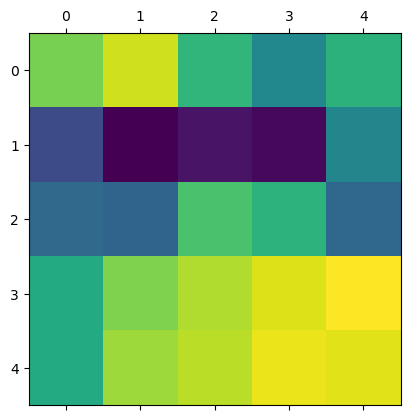

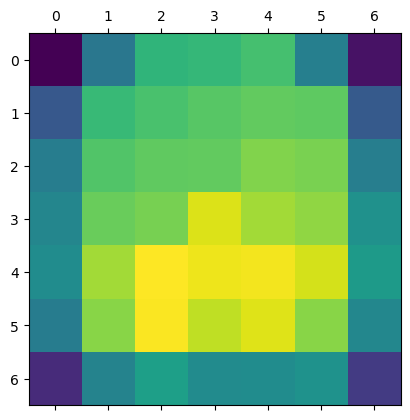

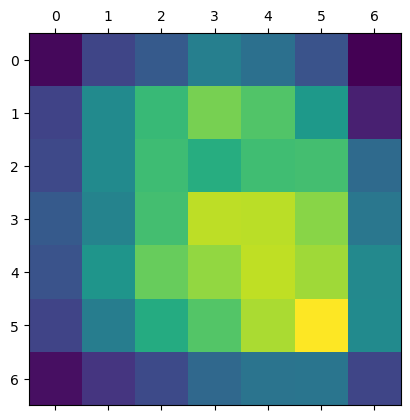

In [198]:
img_path ="BTS-CLAHE-RESIZE/clahe-resize/testing/pituitary/Te-pi_0221.jpg"
img_array = get_img_array(img_path, size=224)
# Generate class activation heatmap
inception_last="conv_7b"
densenet_last="conv5_block32_concat"
xception_last="block14_sepconv2_act"
heatmap_inception = make_gradcam_heatmap(img_array, inception_model,inception_last, ['conv_7b_bn','conv_7b_ac'])
heatmap_densenet = make_gradcam_heatmap(img_array, densenet_model, densenet_last,['bn','relu'])
heatmap_xception = make_gradcam_heatmap(img_array, xception_model, xception_last,['block14_sepconv2_bn','block14_sepconv2_act'])


# Display heatmap
plt.matshow(heatmap_inception)
plt.show()
plt.matshow(heatmap_densenet)
plt.show()
plt.matshow(heatmap_xception)
plt.show()

from skimage.transform import resize

# heatmap_inception= resize(heatmap_inception, (7, 7))
# heatmap_densenet= resize(heatmap_densenet, (5, 5))
# heatmap_xception= resize(heatmap_xception, (224, 224))

In [199]:
from PIL import Image


In [200]:
def save_and_display_gradcam(img_path, heatmaps, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Average the heatmaps and rescale to 0-255
    max_pool = np.maximum.reduce(heatmaps)
    heatmap = np.uint8(255 * max_pool)
    
    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image.open(cam_path))

C:\Users\HP\AppData\Local\Temp\ipykernel_900\3030867178.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


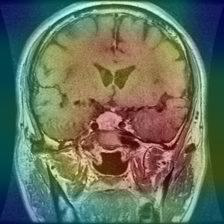

In [201]:
save_and_display_gradcam(img_path, [heatmap_xception ])